In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [3]:
# Save the input and target variables

print(diabetes_dataset.keys())
data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [4]:
# Normalise the target data (this will make clearer training curves)

targets = (targets - targets.mean(axis=0))/targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [5]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size= 0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [6]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def get_model():
    model = Sequential([
        Dense(128, activation ="relu", input_shape=(train_data.shape[1],)),
        Dense(128, activation ="relu"),
        Dense(128, activation ="relu"),
        Dense(128, activation ="relu"),
        Dense(128, activation ="relu"),
        Dense(128, activation ="relu"),
        Dense(1)
    ])
    return model

model = get_model()


In [7]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [8]:
# Compile the model

model.compile(
    Optimizer ='Adam',
    loss = 'mse',
    metric=['mae']
)

In [9]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs = 100,
                   validation_split= 0.5, batch_size = 64, verbose= 2)

Train on 198 samples, validate on 199 samples
Epoch 1/100
198/198 - 2s - loss: 0.9512 - val_loss: 1.0792
Epoch 2/100
198/198 - 0s - loss: 0.8330 - val_loss: 0.9143
Epoch 3/100
198/198 - 0s - loss: 0.6067 - val_loss: 0.6137
Epoch 4/100
198/198 - 0s - loss: 0.5029 - val_loss: 0.8188
Epoch 5/100
198/198 - 0s - loss: 0.6308 - val_loss: 0.5551
Epoch 6/100
198/198 - 0s - loss: 0.4807 - val_loss: 0.6121
Epoch 7/100
198/198 - 0s - loss: 0.4661 - val_loss: 0.8526
Epoch 8/100
198/198 - 0s - loss: 0.6529 - val_loss: 0.6779
Epoch 9/100
198/198 - 0s - loss: 0.4478 - val_loss: 0.5887
Epoch 10/100
198/198 - 0s - loss: 0.4754 - val_loss: 0.5916
Epoch 11/100
198/198 - 0s - loss: 0.5301 - val_loss: 0.7376
Epoch 12/100
198/198 - 0s - loss: 0.4491 - val_loss: 0.7692
Epoch 13/100
198/198 - 0s - loss: 0.4945 - val_loss: 0.8256
Epoch 14/100
198/198 - 0s - loss: 0.4978 - val_loss: 0.6308
Epoch 15/100
198/198 - 0s - loss: 0.4154 - val_loss: 0.9047
Epoch 16/100
198/198 - 0s - loss: 0.6541 - val_loss: 0.6222
Epo

In [10]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose = 2)

45/1 - 0s - loss: 0.5473


0.7686274111270904

#### Plot the learning curves

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

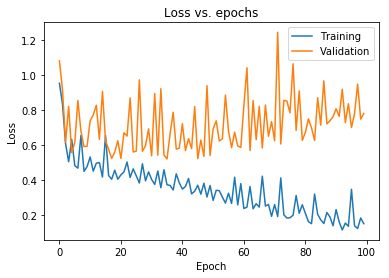

In [12]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [13]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [36]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128,kernel_regularizer = regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128,kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [37]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(1e-5, 0.3)


In [38]:
# Compile the model

model.compile(optimizer="adam", loss= "mse", metrics = ["mae"])

In [39]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs = 100, validation_split = 0.15, batch_size = 64, verbose = 2)


Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 2s - loss: 1.0063 - mae: 0.8498 - val_loss: 0.9556 - val_mae: 0.8438
Epoch 2/100
337/337 - 0s - loss: 0.9940 - mae: 0.8455 - val_loss: 0.9260 - val_mae: 0.8316
Epoch 3/100
337/337 - 0s - loss: 0.9600 - mae: 0.8336 - val_loss: 0.8350 - val_mae: 0.7847
Epoch 4/100
337/337 - 0s - loss: 0.8625 - mae: 0.7896 - val_loss: 0.6518 - val_mae: 0.6747
Epoch 5/100
337/337 - 0s - loss: 0.6990 - mae: 0.6977 - val_loss: 0.5233 - val_mae: 0.5780
Epoch 6/100
337/337 - 0s - loss: 0.6611 - mae: 0.6533 - val_loss: 0.4803 - val_mae: 0.5522
Epoch 7/100
337/337 - 0s - loss: 0.6172 - mae: 0.6429 - val_loss: 0.4630 - val_mae: 0.5583
Epoch 8/100
337/337 - 0s - loss: 0.6212 - mae: 0.6604 - val_loss: 0.4483 - val_mae: 0.5499
Epoch 9/100
337/337 - 0s - loss: 0.6074 - mae: 0.6437 - val_loss: 0.4398 - val_mae: 0.5194
Epoch 10/100
337/337 - 0s - loss: 0.5593 - mae: 0.6138 - val_loss: 0.3979 - val_mae: 0.5167
Epoch 11/100
337/337 - 0s - loss: 0.5870 - m

In [40]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose = 2)

45/1 - 0s - loss: 0.5335 - mae: 0.5533


[0.5405594348907471, 0.55327034]

#### Plot the learning curves

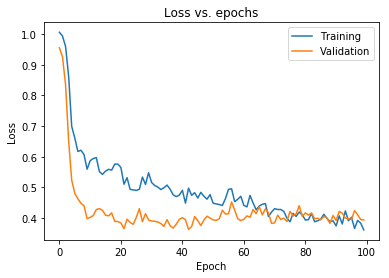

In [41]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [49]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):   # training callback
    
    def on_train_begin(self, logs = None):
        print("Starting training .....")
        
    def on_epoch_begin(self, epoch, logs = None):
        print(f"Starting epoch {epoch}")
        
    def on_train_batch_begin(self, batch, logs = None):
        print(f"Training: Starting batch {batch}")
    
    def on_train_batch_end(self, batch, logs = None):
        print(f"Trainig: Finished batch {batch}")
        
        
    def on_epoch_end(self, epoch, logs = None):
        print(f"Finished epoch {epoch}")
    
    def on_train_end(self, logs = None):
        print("Finished training")

class TestingCallback(Callback):  # testing callback
    
    def on_test_begin(self, logs = None):
        print("Starting testing .....")
        
        
    def on_test_batch_begin(self, batch, logs = None):
        print(f"Testing: Starting batch {batch}")
    
    def on_test_batch_end(self, batch, logs = None):
        print(f"Testing: Finished batch {batch}")
        
   
    def on_test_end(self, logs = None):
        print("Finished testing")

class PredictingCallback(Callback):  # Predicting callback
    
    def on_predict_begin(self, logs = None):
        print("Starting predicting .....")
        
        
    def on_predict_batch_begin(self, batch, logs = None):
        print(f"Predicting: Starting batch {batch}")
    
    def on_predict_batch_end(self, batch, logs = None):
        print(f"Predicting: Finished batch {batch}")
        
   
    def on_predict_end(self, logs = None):
        print("Finished predicting")

In [50]:
# Re-build the model

model = get_regularised_model(1e-5, 0.3)

In [52]:
# Compile the model


model.compile(optimizer = "adam", loss = "mse" )

#### Train the model with the callback

In [53]:
# Train the model, with some of the data reserved for validation
model.fit(train_data, train_targets, epochs = 3,batch_size = 128,verbose = False, callbacks = [TrainingCallback()])


Starting training .....
Starting epoch 0
Training: Starting batch 0
Trainig: Finished batch 0
Training: Starting batch 1
Trainig: Finished batch 1
Training: Starting batch 2
Trainig: Finished batch 2
Training: Starting batch 3
Trainig: Finished batch 3
Finished epoch 0
Starting epoch 1
Training: Starting batch 0
Trainig: Finished batch 0
Training: Starting batch 1
Trainig: Finished batch 1
Training: Starting batch 2
Trainig: Finished batch 2
Training: Starting batch 3
Trainig: Finished batch 3
Finished epoch 1
Starting epoch 2
Training: Starting batch 0
Trainig: Finished batch 0
Training: Starting batch 1
Trainig: Finished batch 1
Training: Starting batch 2
Trainig: Finished batch 2
Training: Starting batch 3
Trainig: Finished batch 3
Finished epoch 2
Finished training


In [54]:
# Evaluate the model

model.evaluate(test_data, test_targets, verbose = 2,callbacks = [TestingCallback()])

Starting testing .....
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
45/1 - 0s - loss: 1.1081
Finished testing


1.02674191792806

In [56]:
# Make predictions with the model

model.predict(test_data,verbose = False,callbacks = [TestingCallback()])

array([[-0.05530162],
       [-0.07100799],
       [ 0.00813285],
       [ 0.00819123],
       [ 0.00428197],
       [-0.09120724],
       [-0.06573185],
       [-0.00621328],
       [-0.00192821],
       [-0.07230989],
       [-0.01165536],
       [-0.04945575],
       [ 0.01581935],
       [ 0.00777961],
       [-0.0840717 ],
       [-0.06610993],
       [-0.03756097],
       [ 0.01309118],
       [-0.02832289],
       [-0.04806517],
       [-0.07662272],
       [ 0.01505312],
       [-0.03952727],
       [-0.05188341],
       [-0.02822164],
       [ 0.0164925 ],
       [-0.08298262],
       [ 0.01422392],
       [-0.04829859],
       [-0.02920382],
       [-0.03401851],
       [ 0.00715325],
       [-0.00058048],
       [ 0.0019391 ],
       [-0.05648455],
       [-0.00722937],
       [ 0.01788785],
       [-0.06567617],
       [-0.04979343],
       [ 0.00617268],
       [-0.08960987],
       [-0.00693271],
       [-0.03399764],
       [ 0.0200421 ],
       [-0.07875942]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [66]:
# Re-train the unregularised model
unregularised_model = get_model()
unregularised_model.compile(optimizer ="adam", loss ="mse")
unreg_history = unregularised_model.fit(train_data, train_targets, epochs=100,
                                       validation_split = 0.15, batch_size = 64, verbose = False,
                                       callbacks =[tf.keras.callbacks.EarlyStopping(patience = 10)])





In [67]:
# Evaluate the model on the test set

unregularised_model.evaluate(test_data, test_targets,verbose = 2)

45/1 - 0s - loss: 0.4814


0.5215553257200453

In [68]:
# Re-train the regularised model

regularised_model = get_regularised_model(1e-8, 0.2)
regularised_model.compile(optimizer = "adam", loss ="mse")
reg_history = regularised_model.fit(train_data, train_targets, epochs= 100,
                                   validation_split = 0.15, batch_size = 64, verbose = False,
                                       callbacks =[tf.keras.callbacks.EarlyStopping(patience = 10)])


In [69]:
# Evaluate the model on the test set

regularised_model.evaluate(test_data, test_targets, verbose = 2)

45/1 - 0s - loss: 0.5027


0.5127893898222181

#### Plot the learning curves

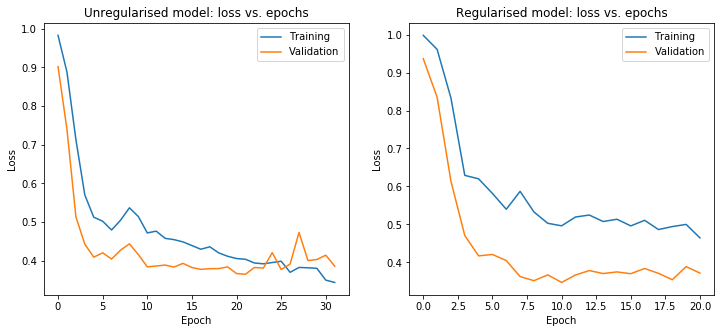

In [70]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()